In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sleep_eeg.pre_processing.sleep_cycles import *
from sleep_eeg.plotting.sleep_cycles import *
from sleep_eeg.plotting.morning_questionnaire import *
from sleep_eeg.plotting.model_comparaison import *
from sleep_eeg.utils import *

In [2]:
mq = load_mq_file()
mq

,Group,Participant,Night,Drug,mq_1_Sleeplatency,mq_2_times_awake,mq_3_time_lay_awake,mq_4_calm_sleep,mq_5_superficial_sleep,mq_6_recovery,mq_7_bad_mood,mq_8_energy,mq_9_tense,mq_10_unconcentrated
A01_N3,A,1.0,N3,0.0,60.0,1.0,10.0,40.0,39.0,22.0,50.0,46.0,56.0,68.0
A01_N4,A,1.0,N4,1.0,45.0,2.0,15.0,12.0,97.0,0.0,89.0,10.0,80.0,86.0
A01_N5,A,1.0,N5,2.0,30.0,1.0,5.0,41.0,57.0,44.0,61.0,42.0,56.0,56.0
A02_N3,A,2.0,N3,2.0,25.0,5.0,50.0,37.0,59.0,29.0,50.0,50.0,58.0,40.0
A02_N4,A,2.0,N4,0.0,24.0,5.0,53.0,50.0,37.0,37.0,33.0,59.0,24.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B23_N4,B,23.0,N4,2.0,5.0,3.0,15.0,61.0,34.0,50.0,42.0,56.0,39.0,37.0
B23_N5,B,23.0,N5,1.0,5.0,5.0,15.0,54.0,36.0,30.0,43.0,50.0,36.0,50.0
B24_N3,B,24.0,N3,2.0,10.0,4.0,12.0,34.0,50.0,54.0,34.0,54.0,42.0,47.0
B24_N4,B,24.0,N4,0.0,15.0,4.0,15.0,42.0,54.0,39.0,31.0,51.0,38.0,44.0


In [3]:
age_bmi = load_age_bmi_file()
age_bmi

,Group,Participant,Age (y),"Sex (1=m, 2=f)",bmi (kg/m^2)
0,A,1.0,25.0,2.0,20.381570
1,A,2.0,30.0,1.0,23.299800
2,A,4.0,42.0,2.0,27.343750
3,A,6.0,27.0,2.0,18.645344
4,A,8.0,24.0,2.0,24.801587
5,A,9.0,27.0,2.0,20.322253
6,A,10.0,34.0,2.0,18.218322
7,A,11.0,28.0,1.0,20.524691
8,A,12.0,23.0,1.0,21.629649
9,A,13.0,20.0,2.0,25.529645


In [9]:
age_bmi.columns.tolist()

['Group', 'Participant', 'Age (y)', 'Sex (1=m, 2=f)', 'bmi (kg/m^2)']

In [6]:
pd.merge(mq, age_bmi)

,Group,Participant,Night,Drug,mq_1_Sleeplatency,mq_2_times_awake,mq_3_time_lay_awake,mq_4_calm_sleep,mq_5_superficial_sleep,mq_6_recovery,mq_7_bad_mood,mq_8_energy,mq_9_tense,mq_10_unconcentrated,Age (y),"Sex (1=m, 2=f)",bmi (kg/m^2)
0,A,1.0,N3,0.0,60.0,1.0,10.0,40.0,39.0,22.0,50.0,46.0,56.0,68.0,25.0,2.0,20.381570
1,A,1.0,N4,1.0,45.0,2.0,15.0,12.0,97.0,0.0,89.0,10.0,80.0,86.0,25.0,2.0,20.381570
2,A,1.0,N5,2.0,30.0,1.0,5.0,41.0,57.0,44.0,61.0,42.0,56.0,56.0,25.0,2.0,20.381570
3,A,2.0,N3,2.0,25.0,5.0,50.0,37.0,59.0,29.0,50.0,50.0,58.0,40.0,30.0,1.0,23.299800
4,A,2.0,N4,0.0,24.0,5.0,53.0,50.0,37.0,37.0,33.0,59.0,24.0,33.0,30.0,1.0,23.299800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,B,23.0,N4,2.0,5.0,3.0,15.0,61.0,34.0,50.0,42.0,56.0,39.0,37.0,21.0,1.0,25.057360
123,B,23.0,N5,1.0,5.0,5.0,15.0,54.0,36.0,30.0,43.0,50.0,36.0,50.0,21.0,1.0,25.057360
124,B,24.0,N3,2.0,10.0,4.0,12.0,34.0,50.0,54.0,34.0,54.0,42.0,47.0,27.0,1.0,23.671254
125,B,24.0,N4,0.0,15.0,4.0,15.0,42.0,54.0,39.0,31.0,51.0,38.0,44.0,27.0,1.0,23.671254


In [7]:
mq = load_mq_file()
mq

,Group,Participant,Night,Drug,mq_1_Sleeplatency,mq_2_times_awake,mq_3_time_lay_awake,mq_4_calm_sleep,mq_5_superficial_sleep,mq_6_recovery,mq_7_bad_mood,mq_8_energy,mq_9_tense,mq_10_unconcentrated
A01_N3,A,1.0,N3,0.0,60.0,1.0,10.0,40.0,39.0,22.0,50.0,46.0,56.0,68.0
A01_N4,A,1.0,N4,1.0,45.0,2.0,15.0,12.0,97.0,0.0,89.0,10.0,80.0,86.0
A01_N5,A,1.0,N5,2.0,30.0,1.0,5.0,41.0,57.0,44.0,61.0,42.0,56.0,56.0
A02_N3,A,2.0,N3,2.0,25.0,5.0,50.0,37.0,59.0,29.0,50.0,50.0,58.0,40.0
A02_N4,A,2.0,N4,0.0,24.0,5.0,53.0,50.0,37.0,37.0,33.0,59.0,24.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B23_N4,B,23.0,N4,2.0,5.0,3.0,15.0,61.0,34.0,50.0,42.0,56.0,39.0,37.0
B23_N5,B,23.0,N5,1.0,5.0,5.0,15.0,54.0,36.0,30.0,43.0,50.0,36.0,50.0
B24_N3,B,24.0,N3,2.0,10.0,4.0,12.0,34.0,50.0,54.0,34.0,54.0,42.0,47.0
B24_N4,B,24.0,N4,0.0,15.0,4.0,15.0,42.0,54.0,39.0,31.0,51.0,38.0,44.0


(<Figure size 1500x500 with 10 Axes>,
 array([<Axes: xlabel='mq_1_Sleeplatency', ylabel='Count'>,
        <Axes: xlabel='mq_2_times_awake', ylabel='Count'>,
        <Axes: xlabel='mq_3_time_lay_awake', ylabel='Count'>,
        <Axes: xlabel='mq_4_calm_sleep', ylabel='Count'>,
        <Axes: xlabel='mq_5_superficial_sleep', ylabel='Count'>,
        <Axes: xlabel='mq_6_recovery', ylabel='Count'>,
        <Axes: xlabel='mq_7_bad_mood', ylabel='Count'>,
        <Axes: xlabel='mq_8_energy', ylabel='Count'>,
        <Axes: xlabel='mq_9_tense', ylabel='Count'>,
        <Axes: xlabel='mq_10_unconcentrated', ylabel='Count'>],
       dtype=object))

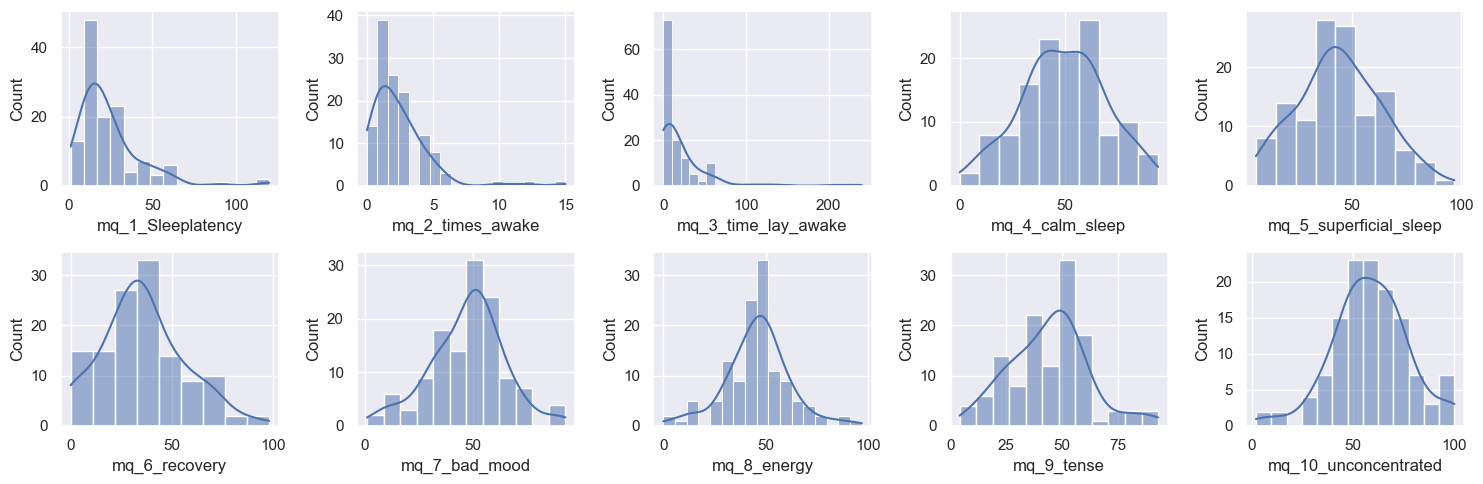

In [8]:
plot_mq_histograms(mq)
# plot_mq_boxplot(mq)

In [17]:
from typing import Literal, Union

In [70]:
def make_classification(
    mq: pd.DataFrame, percentiles: list[float] = [0.25, 0.5, 0.75]
) -> pd.DataFrame:
    classifiable_mqs = [
        "mq_4_calm_sleep",
        "mq_5_superficial_sleep",
        "mq_6_recovery",
        "mq_7_bad_mood",
        "mq_8_energy",
        "mq_9_tense",
        "mq_10_unconcentrated",
    ]
    mq_classified = mq.copy(deep=True)
    quantile_df = mq.describe(percentiles=percentiles)
    percentiles = [
        f"{percentage}%"
        for percentage in (np.round(percentiles, decimals=2) * 100).astype(int).tolist()
    ]

    for mq_metric in classifiable_mqs:
        mq_metric_quantiles = quantile_df[mq_metric]

        def classify(x: float) -> int:
            if 0.0 <= x <= mq_metric_quantiles[percentiles[0]]:
                return 0
            for class_id, (low, high) in enumerate(
                zip(percentiles, percentiles[1:] + ["max"]), start=1
            ):
                if mq_metric_quantiles[low] < x <= mq_metric_quantiles[high]:
                    return class_id

        mq_classified[mq_metric] = mq[mq_metric].apply(classify)

    return mq_classified

In [71]:
percentiles = [0.25, 0.5, 0.75]
# percentiles = [0.2, 0.4, 0.6, 0.8]
# percentiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
mq_classified = make_classification(mq, percentiles=percentiles)

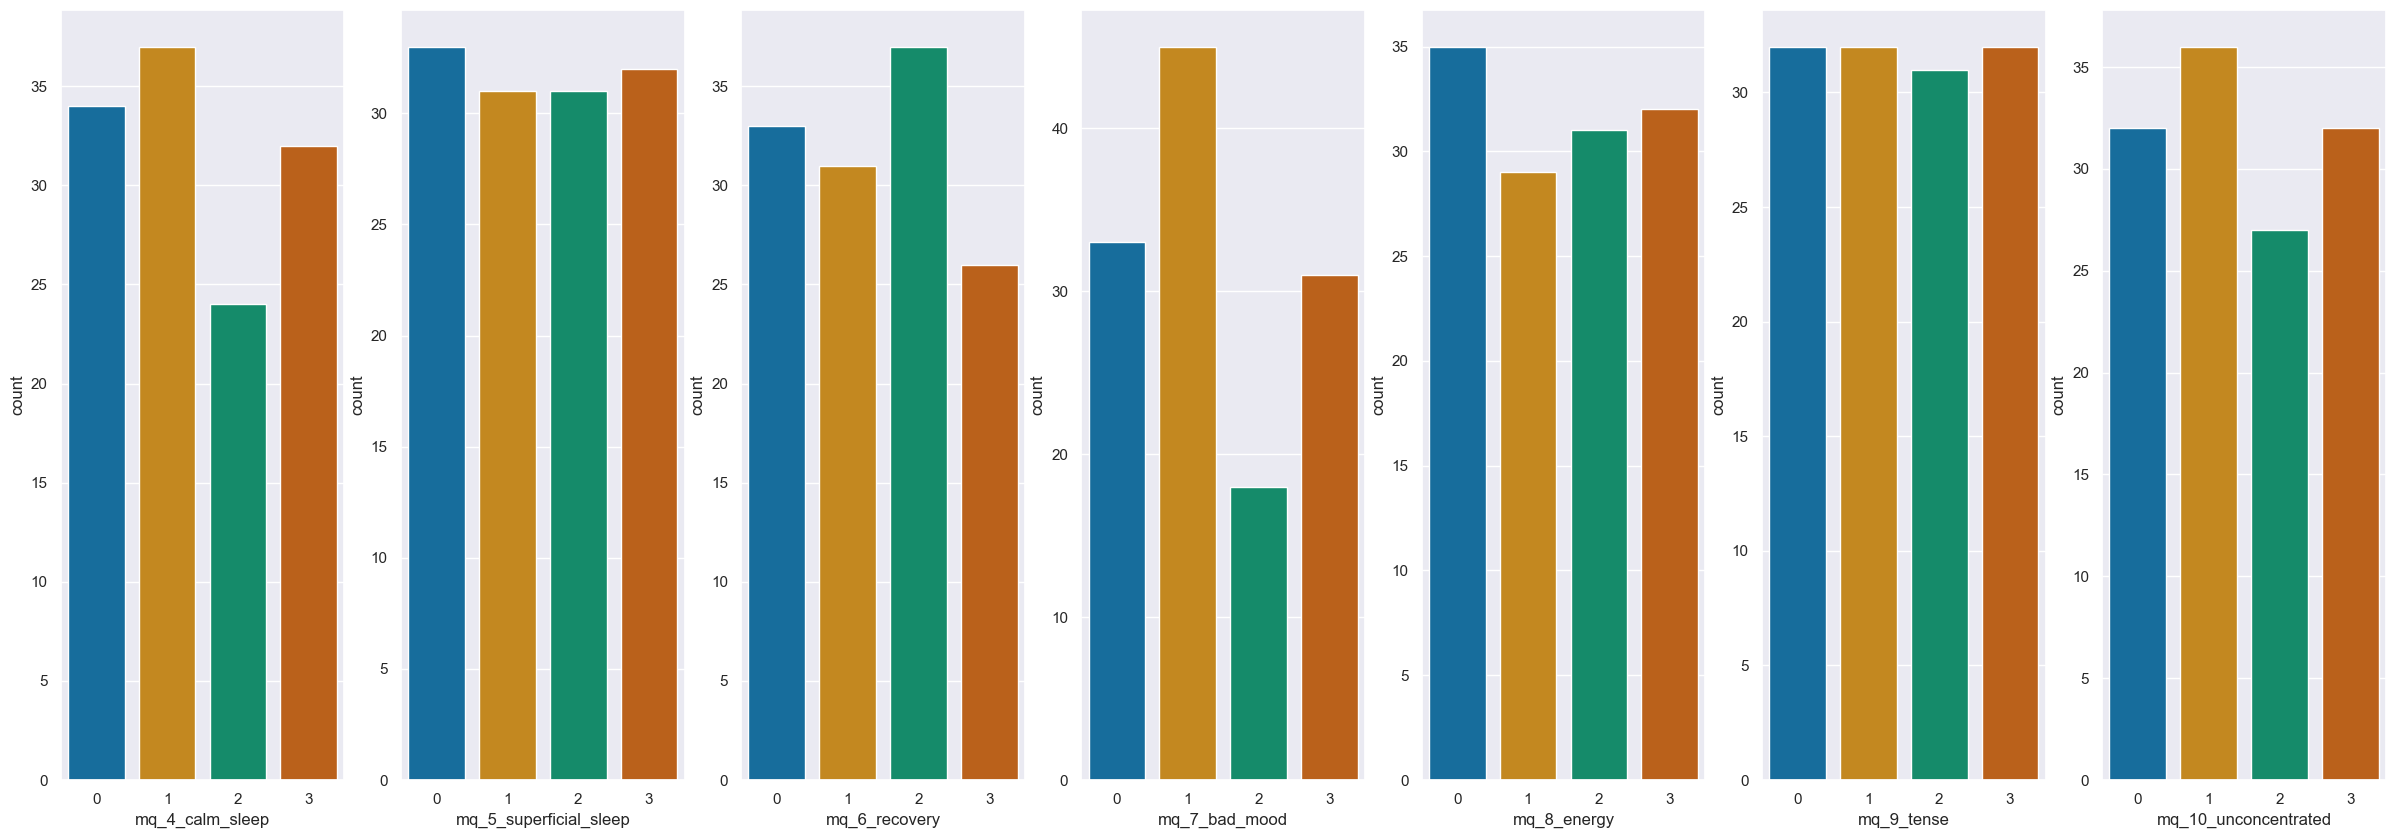

In [72]:
fig, axes = plt.subplots(ncols=7, figsize=(30, 10))

classified_mq_cols = [
    "mq_4_calm_sleep",
    "mq_5_superficial_sleep",
    "mq_6_recovery",
    "mq_7_bad_mood",
    "mq_8_energy",
    "mq_9_tense",
    "mq_10_unconcentrated",
]
for mq_i_class, ax in zip(
    classified_mq_cols,
    axes,
):
    sns.countplot(
        data=mq_classified,
        x=mq_i_class,
        ax=ax,
        hue=mq_i_class,
        legend=False,
        palette=sns.color_palette("colorblind")[: len(percentiles) + 1],
    )

In [73]:
(
    1
    - mq_classified[classified_mq_cols].astype(int).apply(pd.value_counts)
    / mq_classified.shape[0]
)

/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_17412/3862892133.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  - mq_classified[classified_mq_cols].astype(int).apply(pd.value_counts)


,mq_4_calm_sleep,mq_5_superficial_sleep,mq_6_recovery,mq_7_bad_mood,mq_8_energy,mq_9_tense,mq_10_unconcentrated
0,0.732283,0.740157,0.740157,0.740157,0.724409,0.748031,0.748031
1,0.708661,0.755906,0.755906,0.645669,0.771654,0.748031,0.716535
2,0.811024,0.755906,0.708661,0.858268,0.755906,0.755906,0.787402
3,0.748031,0.748031,0.795276,0.755906,0.748031,0.748031,0.748031
